In [7]:
from statistics import *
import seaborn as sns
import matplotlib

In [4]:

print("S T A T I S T I C S")
# plot settings
plot_settings()

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

filename = fr'D:\Dropbox\2D_Codes\ABCI_software\Python_ABCI\Data\2023_17_07_combined_results\all_results_abci_slans (including deleted results).xlsx'
filename = fr'D:\Dropbox\2D_Codes\ABCI_software\Python_ABCI\Data\all_results_abci_slans.xlsx'
# filename = fr'D:\Dropbox\2D_Codes\ABCI_software\Python_ABCI\Data\2023_17_07_combined_results\short_testing.xlsx'
df = load_data(filename)
ic(len(df.index))

# clean dataset
df['freq'] = df['freq'].fillna(400.79)
df = df.loc[(df['freq'] >= 400.29) & (df['freq'] <= 401.29) & (df['L'] <= 200) | (df['freq'].isnull())]

# rename columns to make shorter
df = df.rename(columns={'Z_long[max(0.44<f<0.77)]': 'ZL1', 'Z_long[max(0.77<f<1.1)]': 'ZL2',
                        'Z_long[max(1.1<f<2.0)]': 'ZL3', 'Z_trans[max(0.54<f<0.59)]': 'ZT1',
                        'Z_trans[max(0.59<f<0.75)]': 'ZT2', 'Z_trans[max(0.75<f<1.05)]': 'ZT3',
                        'Z_trans[max(1.05<f<2.0)]': 'ZT4'})

# add new column for maximum long and transverse impedance
df['max_ZL'] = df[['ZL1', 'ZL2', 'ZL3']].max(axis=1)
df['max_ZT'] = df[['ZT1', 'ZT2', 'ZT3', 'ZT4']].max(axis=1)

S T A T I S T I C S


ic| len(df.index): 37749


ic| len(df.index): 33393


\begin{table}[!htb]
\begin{tabular}{lrrrrrrr}
 & A & B & a & b & Ri & L & Req \\
count & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 \\
mean & 90.71 & 111.83 & 52.27 & 67.12 & 153.62 & 175.91 & 359.38 \\
std & 22.72 & 30.79 & 23.08 & 27.89 & 5.64 & 13.78 & 12.60 \\
min & 60.00 & 60.00 & 20.00 & 20.00 & 140.00 & 140.00 & 322.92 \\
25% & 71.89 & 85.30 & 32.97 & 43.16 & 150.00 & 166.60 & 350.07 \\
50% & 86.20 & 110.70 & 48.20 & 66.40 & 150.40 & 182.90 & 359.73 \\
75% & 105.59 & 137.52 & 68.13 & 89.87 & 156.90 & 187.00 & 369.05 \\
max & 165.60 & 170.00 & 119.97 & 119.98 & 169.90 & 189.99 & 393.41 \\
\end{tabular}
\end{table}

\begin{table}[!htb]
\begin{tabular}{lrrrrrrrrrrr}
 & Epk/Eacc & Bpk/Eacc & k_loss_long & k_loss_trans & ZL1 & ZL2 & ZL3 & ZT1 & ZT2 & ZT3 & ZT4 \\
count & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 & 33393.00 \\
mean & 2.79 & 5.36 & 0.03 & 0.51 & 0.46 & 0.60 & 0.38 & 2.72 &

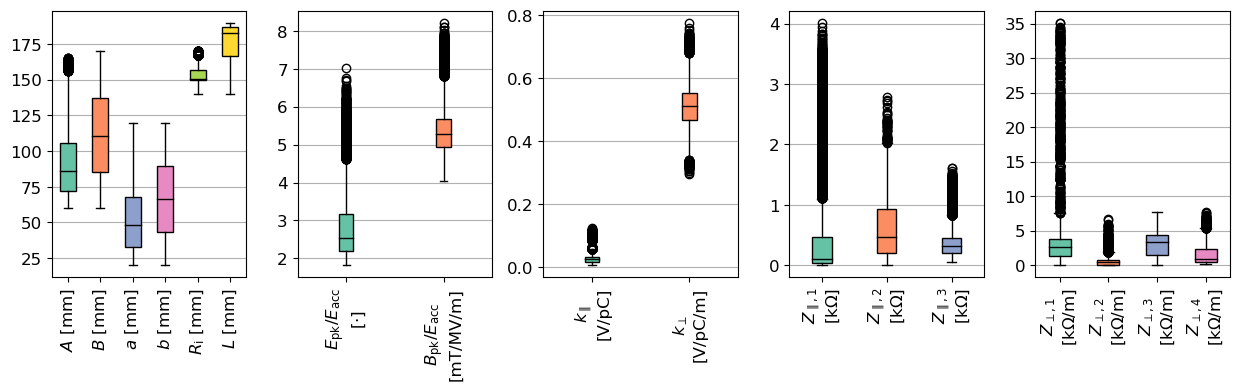

In [5]:
# describe dataset
describe_data(df[['A', 'B', 'a', 'b', 'Ri', 'L', 'Req']])
describe_data(df[['Epk/Eacc', 'Bpk/Eacc',
                  'k_loss_long', 'k_loss_trans',
                  'ZL1', 'ZL2', 'ZL3',
                  'ZT1', 'ZT2', 'ZT3', 'ZT4']])

ic(len(df.index))
df = df[['A', 'B', 'a', 'b', 'Ri', 'L', 'Req', 'freq',
         'Epk/Eacc', 'Bpk/Eacc',
         'k_loss_long', 'k_loss_trans',
         'max_ZL', 'max_ZT',
         'ZL1', 'ZL2', 'ZL3',
         'ZT1', 'ZT2', 'ZT3', 'ZT4']]

# plot_boxplot(df, ['A', 'B', 'a', 'b', 'Ri', 'L'])
# plot_boxplot(df, ['Epk/Eacc', 'Bpk/Eacc'])
# plot_boxplot(df, ['k_loss_long', 'k_loss_trans'])
# plot_boxplot(df, ['max_ZL', 'max_ZT'])
# plot_boxplot(df, ['ZL1', 'ZL2', 'ZL3',
#                   'ZT1', 'ZT2', 'ZT3', 'ZT4'])

plot_boxplot_multiple(df,
                      [['A', 'B', 'a', 'b', 'Ri', 'L'], ['Epk/Eacc', 'Bpk/Eacc'], ['k_loss_long', 'k_loss_trans'],
                       ['ZL1', 'ZL2', 'ZL3'], ['ZT1', 'ZT2', 'ZT3', 'ZT4']],
                      [[0, 1, 2, 3, 4]],
                      xtickslabel={
                          0: ['$A$ [mm]', '$B$ [mm]', '$a$ [mm]', '$b$ [mm]', '$R_\mathrm{i}$ [mm]', '$L$ [mm]'],
                          1: ['$E_\mathrm{pk}/E_\mathrm{acc}$\n[$\cdot$]',
                              '$B_\mathrm{pk}/E_\mathrm{acc}$\n[mT/MV/m]'],
                          2: ['$k_\parallel$\n[V/pC]', '$k_\perp$\n[V/pC/m]'],
                          3: ['$Z_{\parallel, 1}$\n[k$\Omega$]', '$Z_{\parallel, 2}$\n[k$\Omega$]',
                              '$Z_{\parallel, 3}$\n[k$\Omega$]'],
                          4: ['$Z_{\perp, 1}$\n[k$\Omega$/m]', '$Z_{\perp, 2}$\n[k$\Omega$/m]',
                              '$Z_{\perp, 3}$\n[k$\Omega$/m]', '$Z_{\perp, 4}$\n[k$\Omega$/m]']})

In [11]:
df.head

<bound method NDFrame.head of             A       B      a       b     Ri       L         Req      freq  \
0      115.15  117.60  51.62   44.71  155.0  168.88  343.826561  400.7894   
1       97.31   68.98  74.07   75.60  155.0  183.58  345.082785  400.7912   
2       94.56  137.94  78.23   94.64  155.0  189.84  361.672989  400.7912   
3       69.30  124.01  99.18   37.69  155.0  178.70  362.469237  400.7899   
4      111.59  106.35  20.73   29.66  155.0  158.84  349.576014  400.7905   
...       ...     ...    ...     ...    ...     ...         ...       ...   
37744  117.00  113.80  39.00   36.90  150.0  157.30  340.171524  400.7895   
37745  111.50  114.70  32.40   85.70  150.0  178.40  352.207822  400.7891   
37746   85.80  110.20  93.20  108.10  150.0  188.80  358.805581  400.7898   
37747  105.40   99.70  26.40   27.40  150.0  173.80  350.473108  400.7904   
37748   67.30   94.50  48.20   33.90  150.0  161.30  366.968622  400.7879   

       Epk/Eacc  Bpk/Eacc  k_loss_long  k_los

Index(['A', 'B', 'a', 'b', 'Ri', 'L', 'Req'], dtype='object')


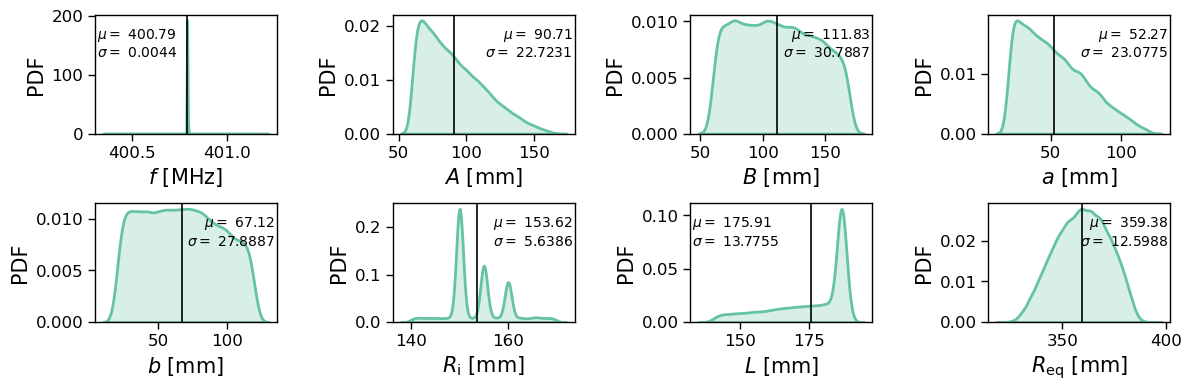

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(12,4))

sns.set_context("paper", rc={"axes.labelsize":15})   

sns.kdeplot(df['freq'], fill=True, ax=axes[0, 0], lw=2).set(xlabel='$f$ [MHz]', ylabel='PDF')
# axes[0, 0].legend(labels=['$A_{\mathrm{el}}$', '$A^{(0)}_{\mathrm{m0}}$', '$A_{\mathrm{er}}$'])
text = '$\mu =$ ' + f"{df['freq'].mean():.2f}" + '\n$\sigma = $ ' + f"{df['freq'].std():.4f}"
axes[0, 0].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[0, 0].transAxes)

# plot mean
axes[0, 0].axvline(df['freq'].mean(), c='k')

qois = df.columns[:7]
print(qois)
xlabels = ['$A$ [mm]', '$B$ [mm]', '$a$ [mm]', '$b$ [mm]', '$R_\mathrm{i}$ [mm]', '$L$ [mm]', '$R_\mathrm{eq}$ [mm]']
for i in range(2):
    for j in range(4):
        if (i == 0 and j == 0):
            continue
        sns.kdeplot(df[qois[4*i + j - 1]], fill=True, ax=axes[i, j], lw=2).set(xlabel=xlabels[4*i + j - 1], ylabel='PDF')

        # plot mean
        axes[i, j].axvline(df[qois[4*i + j - 1]].mean(), c='k')

        text = '$\mu =$ ' + f"{df[qois[4*i + j - 1]].mean():.2f}" + '\n$\sigma = $ ' + f"{df[qois[4*i + j - 1]].std():.4f}"
        if (4*i + j - 1) in [5]:
            axes[i, j].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[i, j].transAxes)
        else:
            axes[i, j].text(0.99, 0.9, text, fontsize = 10, color = "k", ha = "right", va = "top", transform = axes[i, j].transAxes)
            
        
# sns.kdeplot(df['R/Q [Ohm]'], fill=True, ax=axes[0, 2], lw=2).set(xlabel='$R/Q$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['Epk/Eacc []'], fill=True, ax=axes[0, 3], lw=2).set(xlabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []', ylabel='PDF')
# sns.kdeplot(df['Bpk/Eacc [mT/MV/m]'], fill=True, ax=axes[1, 0], lw=2).set(xlabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]', ylabel='PDF')
# sns.kdeplot(df['G [Ohm]'], fill=True, ax=axes[1, 1], lw=2).set(xlabel='$G$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['kcc [%]'], fill=True, ax=axes[1, 2], lw=2).set(xlabel='$k_\mathrm{cc}$ [%]', ylabel='PDF')
# sns.kdeplot(df['ff [%]'], fill=True, ax=axes[1, 3], lw=2).set(xlabel='$ff$ [%]', ylabel='PDF')
for ax in axes.flatten():
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(fr"D:\Dropbox\Quick presentation files\cav_geom_data_distr.png")

In [21]:
df.head

<bound method NDFrame.head of             A       B      a       b     Ri       L         Req      freq  \
0      115.15  117.60  51.62   44.71  155.0  168.88  343.826561  400.7894   
1       97.31   68.98  74.07   75.60  155.0  183.58  345.082785  400.7912   
2       94.56  137.94  78.23   94.64  155.0  189.84  361.672989  400.7912   
3       69.30  124.01  99.18   37.69  155.0  178.70  362.469237  400.7899   
4      111.59  106.35  20.73   29.66  155.0  158.84  349.576014  400.7905   
...       ...     ...    ...     ...    ...     ...         ...       ...   
37744  117.00  113.80  39.00   36.90  150.0  157.30  340.171524  400.7895   
37745  111.50  114.70  32.40   85.70  150.0  178.40  352.207822  400.7891   
37746   85.80  110.20  93.20  108.10  150.0  188.80  358.805581  400.7898   
37747  105.40   99.70  26.40   27.40  150.0  173.80  350.473108  400.7904   
37748   67.30   94.50  48.20   33.90  150.0  161.30  366.968622  400.7879   

       Epk/Eacc  Bpk/Eacc  k_loss_long  k_los

Index(['Epk/Eacc', 'Bpk/Eacc', 'k_loss_long', 'k_loss_trans', 'ZL1', 'ZL2',
       'ZL3', 'ZT1', 'ZT2', 'ZT3', 'ZT4'],
      dtype='object')


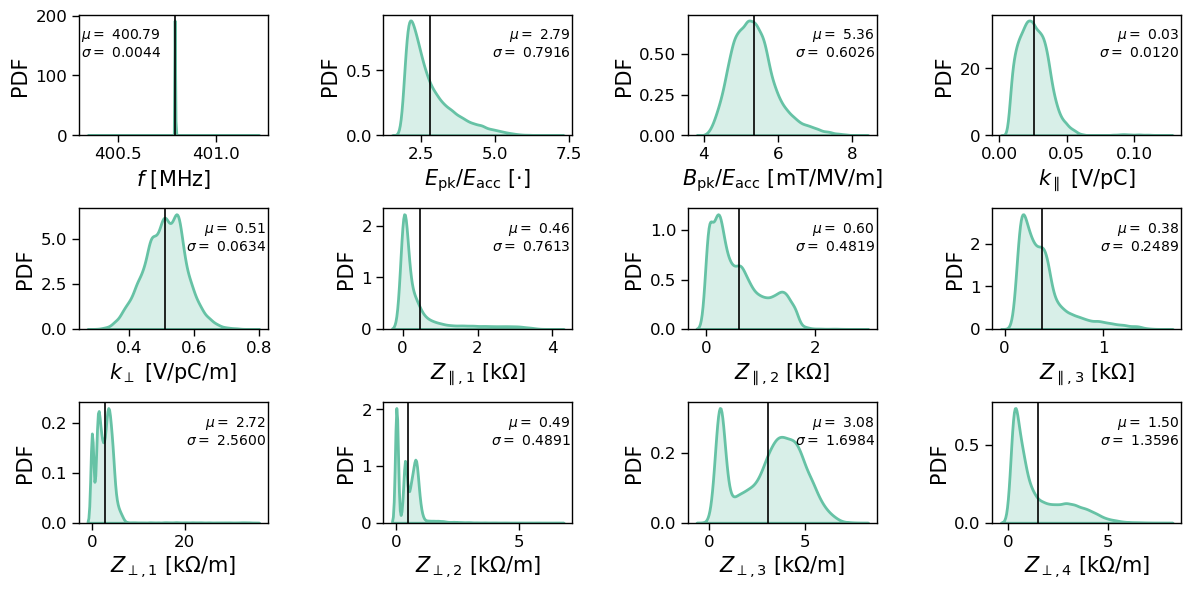

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(12,6))

# select df_qois

df_qois = df[['freq', 'Epk/Eacc', 'Bpk/Eacc', 'k_loss_long', 'k_loss_trans', 
              'ZL1', 'ZL2', 'ZL3',
              'ZT1', 'ZT2', 'ZT3', 'ZT4']]

sns.set_context("paper", rc={"axes.labelsize":15})   

sns.kdeplot(df_qois['freq'], fill=True, ax=axes[0, 0], lw=2).set(xlabel='$f$ [MHz]', ylabel='PDF')
# axes[0, 0].legend(labels=['$A_{\mathrm{el}}$', '$A^{(0)}_{\mathrm{m0}}$', '$A_{\mathrm{er}}$'])
text = '$\mu =$ ' + f"{df_qois['freq'].mean():.2f}" + '\n$\sigma = $ ' + f"{df_qois['freq'].std():.4f}"
axes[0, 0].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[0, 0].transAxes)

# plot mean
axes[0, 0].axvline(df_qois['freq'].mean(), c='k')

qois = df_qois.columns[1:]
print(qois)

xlabels = ['$E_\mathrm{pk}/E_\mathrm{acc}$ [$\cdot$]', '$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]', 
           '$k_\parallel$ [V/pC]', '$k_\perp$ [V/pC/m]', '$Z_{\parallel, 1}$ [k$\Omega$]', 
           '$Z_{\parallel, 2}$ [k$\Omega$]', '$Z_{\parallel, 3}$ [k$\Omega$]', 
           '$Z_{\perp, 1}$ [k$\Omega$/m]', '$Z_{\perp, 2}$ [k$\Omega$/m]',
           '$Z_{\perp, 3}$ [k$\Omega$/m]', '$Z_{\perp, 4}$ [k$\Omega$/m]']

for i in range(3):
    for j in range(4):
        if (i == 0 and j == 0):
            continue
        sns.kdeplot(df_qois[qois[4*i + j - 1]], fill=True, ax=axes[i, j], lw=2).set(xlabel=xlabels[4*i + j - 1], ylabel='PDF')

        # plot mean
        axes[i, j].axvline(df_qois[qois[4*i + j - 1]].mean(), c='k')

        text = '$\mu =$ ' + f"{df_qois[qois[4*i + j - 1]].mean():.2f}" + '\n$\sigma = $ ' + f"{df_qois[qois[4*i + j - 1]].std():.4f}"
        if (4*i + j - 1) in []:
            axes[i, j].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[i, j].transAxes)
        else:
            axes[i, j].text(0.99, 0.9, text, fontsize = 10, color = "k", ha = "right", va = "top", transform = axes[i, j].transAxes)
            
        
# sns.kdeplot(df['R/Q [Ohm]'], fill=True, ax=axes[0, 2], lw=2).set(xlabel='$R/Q$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['Epk/Eacc []'], fill=True, ax=axes[0, 3], lw=2).set(xlabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []', ylabel='PDF')
# sns.kdeplot(df['Bpk/Eacc [mT/MV/m]'], fill=True, ax=axes[1, 0], lw=2).set(xlabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]', ylabel='PDF')
# sns.kdeplot(df['G [Ohm]'], fill=True, ax=axes[1, 1], lw=2).set(xlabel='$G$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['kcc [%]'], fill=True, ax=axes[1, 2], lw=2).set(xlabel='$k_\mathrm{cc}$ [%]', ylabel='PDF')
# sns.kdeplot(df['ff [%]'], fill=True, ax=axes[1, 3], lw=2).set(xlabel='$ff$ [%]', ylabel='PDF')
for ax in axes.flatten():
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(fr"D:\Dropbox\Quick presentation files\cav_geom_qois_data_distr.png")

# Show variation of r/q of the first mode with cell length

In [36]:
# get dataframes
filename = fr'D:\Dropbox\2D_Codes\ABCI_software\Python_ABCI\modules\data_module\COMPLETE_SECOND_BATCH_9064_6D_space_w_Rsh_Q_1.xlsx'
df1 = pd.read_excel(filename, 'Sheet1')
filename = fr'D:\Dropbox\2D_Codes\ABCI_software\Python_ABCI\modules\data_module\COMPLETE_THIRD_BATCH_9276_w_Rsh_Q_1.xlsx'
df2 = pd.read_excel(filename, 'Sheet1')

# get only R/Q1 and length
df1_ = df1.loc[:, ['L', 'Rsh/Q1', 'Rsh/Q']]
df2_ = df2.loc[:, ['L', 'Rsh/Q1', 'Rsh/Q']]

# combine dataframe
data = pd.concat([df1_, df2_], axis=0)
ic(len(data.index))

ic| len(data.index): 17926


17926

In [37]:
data.head

<bound method NDFrame.head of           L     Rsh/Q1      Rsh/Q
0     186.8   0.000069  147.16300
1     186.9   0.000078  169.86026
2     186.7   0.000255  172.13602
3     186.9   0.000367  151.09790
4     186.9   0.000840  145.68922
...     ...        ...        ...
9068  140.0  30.708200  147.00030
9069  140.3  30.724160  149.81730
9070  141.3  30.819460  156.89796
9071  140.6  30.898100  150.76688
9072  140.4  30.911980  149.53452

[17926 rows x 3 columns]>

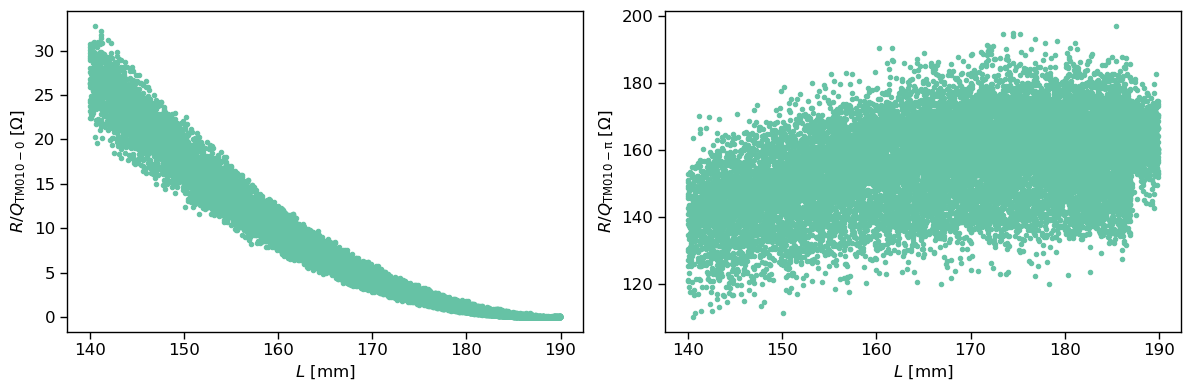

In [50]:
plot_settings()
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax_ylabels = ['$R/Q_\mathrm{TM010-0}$ [$\Omega$]', '$R/Q_\mathrm{TM010-\pi}$ [$\Omega$]']
axes[0].scatter(data['L'], data['Rsh/Q1'], label=ax_ylabels[0], s=10)
axes[1].scatter(data['L'], data['Rsh/Q'], label=ax_ylabels[1], s=10)

axes[0].set_xlabel('$L$ [mm]')
axes[1].set_xlabel('$L$ [mm]')
axes[0].set_ylabel('$R/Q_\mathrm{TM010-0}$ [$\Omega$]')
axes[1].set_ylabel('$R/Q_\mathrm{TM010-\pi}$ [$\Omega$]')

plt.tight_layout()
plt.savefig(fr"D:\Dropbox\Quick presentation files\RQ1_vs_L.png")